**Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.**

### Importing Skin Cancer Data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
print(os.getcwd())

C:\Users\parak\Downloads\Data_Science_Vaibhav_Parakh\#1_UpGrad\Python Course\Formal Course\#27_CNN_Assignment


In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(r"C:\Users\parak\Downloads\Data_Science_Vaibhav_Parakh\#1_UpGrad\Python Course\Formal Course\#27_CNN_Assignment\Dataset\Train")
data_dir_test = pathlib.Path(r'C:\Users\parak\Downloads\Data_Science_Vaibhav_Parakh\#1_UpGrad\Python Course\Formal Course\#27_CNN_Assignment\Dataset\Test')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
data_dir_train,
validation_split = 0.2,
subset = 'training',
seed = 123,
image_size = (img_height, img_width),
batch_size = batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
data_dir_train,
validation_split = 0.2,
subset = 'validation',
seed = 123,
image_size = (img_height, img_width),
batch_size = batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data

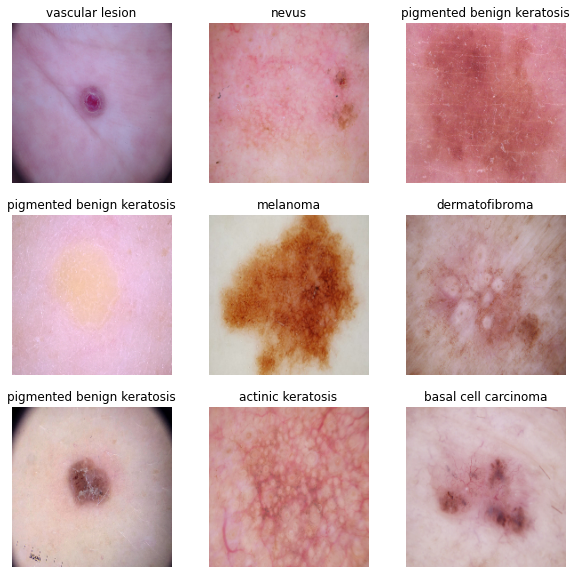

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3 , 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [11]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model

In [13]:
num_classes = 9

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape = (img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation = 'relu'),
    layers.Dense(num_classes)
])

### Compile the model

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

### Train the model

In [16]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 45s 487ms/step - loss: 2.0808 - accuracy: 0.2122 - val_loss: 1.9513 - val_accuracy: 0.2416
Epoch 2/20
56/56 [==============================] - 21s 373ms/step - loss: 1.8635 - accuracy: 0.2944 - val_loss: 1.5105 - val_accuracy: 0.4877
Epoch 3/20
56/56 [==============================] - 21s 383ms/step - loss: 1.5403 - accuracy: 0.4436 - val_loss: 1.5131 - val_accuracy: 0.4944
Epoch 4/20
56/56 [==============================] - 19s 341ms/step - loss: 1.3381 - accuracy: 0.5284 - val_loss: 1.4647 - val_accuracy: 0.5123
Epoch 5/20
56/56 [==============================] - 21s 371ms/step - loss: 1.3421 - accuracy: 0.5265 - val_loss: 1.3294 - val_accuracy: 0.5347
Epoch 6/20
56/56 [==============================] - 21s 372ms/step - loss: 1.2292 - accuracy: 0.5612 - val_loss: 1.3425 - val_accuracy: 0.5615
Epoch 7/20
56/56 [==============================] - 21s 375ms/step - loss: 1.1927 - accuracy: 0.5695 - val_loss: 1.3786 - val_accuracy: 0.5101

### Visualizing training results

In [17]:
his_df = pd.DataFrame(history.history)
his_df.head()

,loss,accuracy,val_loss,val_accuracy
0,2.026410,0.231585,1.951273,0.241611
1,1.766680,0.342634,1.510459,0.487696
2,1.504077,0.457031,1.513117,0.494407
3,1.354053,0.525670,1.464665,0.512304
4,1.307631,0.536272,1.329364,0.534676


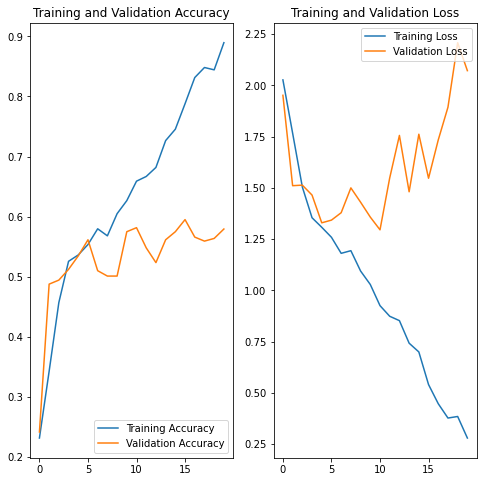

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**As per first sequential CNN model, overfitting can be observed since Training Accuracy is >80% where as the Validation Accuracy is is at nearly 50%. This implies that the model has learnt almost all the data points of the dataset and is unable to generalise and hence, poor performance during validation.**

**To overcome overfitting, we could increase the dataset or make the model simpler using drop-outs or regularisation. We have gone by increasing the data points by method of augmentation and drop-outs have been used in the coding of second model.**

In [19]:
data_augmentation = keras.Sequential(
[layers.experimental.preprocessing.RandomFlip("horizontal",
                                               input_shape = (img_height,
                                                              img_width,
                                                              3)),
 layers.experimental.preprocessing.RandomRotation(0.1),
 layers.experimental.preprocessing.RandomZoom(0.1)
]
)

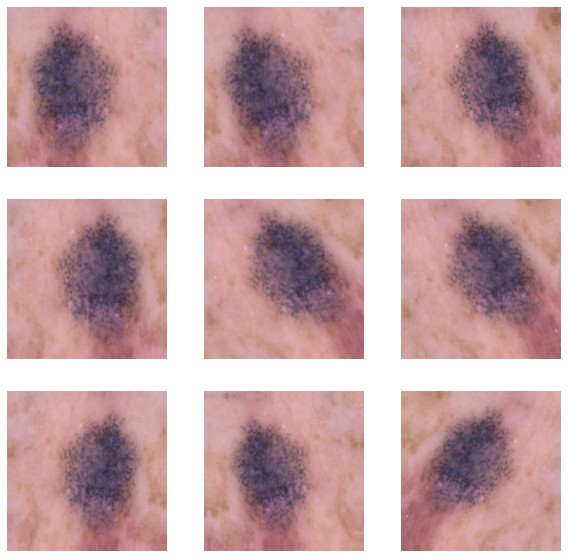

In [20]:
plt.figure(figsize = (10,10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype('uint8'))
        plt.axis("off")

### Create the model, compile and train the model

In [21]:
num_classes = 9

model = Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255, input_shape = (img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(256, activation = 'relu'),
    layers.Dense(num_classes)
])

### Compiling the model

In [22]:
model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'])

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 45, 45, 64)       

### Training the model

In [24]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 24s 408ms/step - loss: 2.0904 - accuracy: 0.1767 - val_loss: 1.9234 - val_accuracy: 0.2796
Epoch 2/20
56/56 [==============================] - 24s 436ms/step - loss: 1.8366 - accuracy: 0.3167 - val_loss: 1.7352 - val_accuracy: 0.4340
Epoch 3/20
56/56 [==============================] - 23s 407ms/step - loss: 1.6337 - accuracy: 0.4273 - val_loss: 1.4791 - val_accuracy: 0.4966
Epoch 4/20
56/56 [==============================] - 23s 413ms/step - loss: 1.4877 - accuracy: 0.4614 - val_loss: 1.4481 - val_accuracy: 0.4989
Epoch 5/20
56/56 [==============================] - 24s 422ms/step - loss: 1.4469 - accuracy: 0.5009 - val_loss: 1.4715 - val_accuracy: 0.4966
Epoch 6/20
56/56 [==============================] - 23s 411ms/step - loss: 1.3387 - accuracy: 0.5289 - val_loss: 1.4129 - val_accuracy: 0.5101
Epoch 7/20
56/56 [==============================] - 22s 395ms/step - loss: 1.3674 - accuracy: 0.5093 - val_loss: 1.3594 - val_accuracy: 0.5123

In [25]:
his_df = pd.DataFrame(history.history)
his_df.head()

,loss,accuracy,val_loss,val_accuracy
0,2.032644,0.219866,1.923359,0.279642
1,1.760734,0.350446,1.735180,0.434004
2,1.569086,0.441964,1.479105,0.496644
3,1.443515,0.484375,1.448119,0.498881
4,1.397739,0.500558,1.471501,0.496644


### Visualizing the results

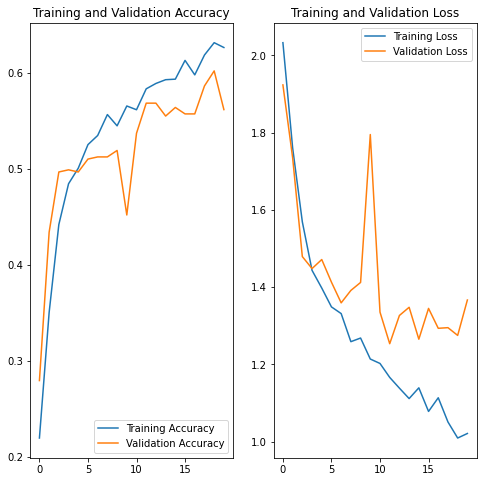

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**As per first sequential CNN model, overfitting can be observed since Training Accuracy is >80% where as the Validation Accuracy is is at nearly 50%. This implies that the model has learnt almost all the data points of the dataset and is unable to generalise and hence, poor performance during validation.**

**As per second sequential CNN model, we have successfully tackled overfitting by method of augmentation since both Training and Validation Accuracy is in the range of 50% to 60%. But, as a consequence of which, we can now observe underfitting by the model since accuracy is low on both accounts.**

**This could be because the model requires enough images for each class to better learn the patterns. In the previous experiment, we proportionately increased the images for processing by method of data augmentation.**

In [27]:
from pathlib import Path

In [28]:
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [29]:
for i in class_names:
    data_dir_train = pathlib.Path("C:\\Users\\parak\\Downloads\\Data_Science_Vaibhav_Parakh\\#1_UpGrad\\Python Course\\Formal Course\\#27_CNN_Assignment\\Dataset\\Train\\" + i)
    path_i = Path(data_dir_train).glob('**/*.jpg')
    print(i, ":", len(list(path_i)))

actinic keratosis : 114
basal cell carcinoma : 376
dermatofibroma : 95
melanoma : 438
nevus : 357
pigmented benign keratosis : 462
seborrheic keratosis : 77
squamous cell carcinoma : 181
vascular lesion : 139


#### - Which class has the least number of samples?

**seborrheic keratosis has the least number of samples.**

#### - Which classes dominate the data in terms proportionate number of samples?
**The following classes: pigmented benign keratosis (462), melanoma (438), basal cell carcinoma (376), and nevus (357) dominate data in terms of proportionate number of samples. They together account for 72% of the data.**

#### Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [30]:
path_to_training_dataset = "C:\\Users\\parak\\Downloads\\Data_Science_Vaibhav_Parakh\\#1_UpGrad\\Python Course\\Formal Course\\#27_CNN_Assignment\\Dataset\\Train\\"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to C:\Users\parak\Downloads\Data_Science_Vaibhav_Parakh\#1_UpGrad\Python Course\Formal Course\#27_CNN_Assignment\Dataset\Train\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x29C02DD7190>: 100%|██████████| 500/500 [00:04<00:00, 113.17 Samples/s]                  
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x29C01A76FD0>:   2%|▏         | 11/500 [00:00<01:10,  6.94 Samples/s]                  

Initialised with 376 image(s) found.
Output directory set to C:\Users\parak\Downloads\Data_Science_Vaibhav_Parakh\#1_UpGrad\Python Course\Formal Course\#27_CNN_Assignment\Dataset\Train\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x29C02A13220>: 100%|██████████| 500/500 [00:04<00:00, 112.33 Samples/s]                  
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x29C02DC9160>:   2%|▏         | 10/500 [00:00<00:57,  8.55 Samples/s]                 

Initialised with 95 image(s) found.
Output directory set to C:\Users\parak\Downloads\Data_Science_Vaibhav_Parakh\#1_UpGrad\Python Course\Formal Course\#27_CNN_Assignment\Dataset\Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x29C01A2ECA0>: 100%|██████████| 500/500 [00:04<00:00, 113.20 Samples/s]                  
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to C:\Users\parak\Downloads\Data_Science_Vaibhav_Parakh\#1_UpGrad\Python Course\Formal Course\#27_CNN_Assignment\Dataset\Train\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x29C02A32B50>: 100%|██████████| 500/500 [00:21<00:00, 23.01 Samples/s]                   
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to C:\Users\parak\Downloads\Data_Science_Vaibhav_Parakh\#1_UpGrad\Python Course\Formal Course\#27_CNN_Assignment\Dataset\Train\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x29C01A8F280>: 100%|██████████| 500/500 [00:18<00:00, 27.07 Samples/s]                    
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x29C02A25970>:   2%|▏         | 11/500 [00:00<00:58,  8.33 Samples/s]

Initialised with 462 image(s) found.
Output directory set to C:\Users\parak\Downloads\Data_Science_Vaibhav_Parakh\#1_UpGrad\Python Course\Formal Course\#27_CNN_Assignment\Dataset\Train\pigmented benign keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x29C02A233A0>: 100%|██████████| 500/500 [00:04<00:00, 108.27 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to C:\Users\parak\Downloads\Data_Science_Vaibhav_Parakh\#1_UpGrad\Python Course\Formal Course\#27_CNN_Assignment\Dataset\Train\seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x29C02DD16A0>: 100%|██████████| 500/500 [00:11<00:00, 45.34 Samples/s]                  
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x29C03165190>:   0%|          | 1/500 [00:00<01:28,  5.65 Samples/s]

Initialised with 181 image(s) found.
Output directory set to C:\Users\parak\Downloads\Data_Science_Vaibhav_Parakh\#1_UpGrad\Python Course\Formal Course\#27_CNN_Assignment\Dataset\Train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x29C0316D160>: 100%|██████████| 500/500 [00:04<00:00, 111.66 Samples/s]                  
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x29C02DCF3A0>:   3%|▎         | 15/500 [00:00<00:52,  9.26 Samples/s]

Initialised with 139 image(s) found.
Output directory set to C:\Users\parak\Downloads\Data_Science_Vaibhav_Parakh\#1_UpGrad\Python Course\Formal Course\#27_CNN_Assignment\Dataset\Train\vascular lesion\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x29C01A84DF0>: 100%|██████████| 500/500 [00:04<00:00, 111.73 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [31]:
data_dir_train = pathlib.Path(path_to_training_dataset)
print(data_dir_train)

C:\Users\parak\Downloads\Data_Science_Vaibhav_Parakh\#1_UpGrad\Python Course\Formal Course\#27_CNN_Assignment\Dataset\Train


In [32]:
import glob

In [33]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [34]:
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['C:\\Users\\parak\\Downloads\\Data_Science_Vaibhav_Parakh\\#1_UpGrad\\Python Course\\Formal Course\\#27_CNN_Assignment\\Dataset\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_0eeb4171-27d1-473f-bb5b-b4649fd8a4cd.jpg',
 'C:\\Users\\parak\\Downloads\\Data_Science_Vaibhav_Parakh\\#1_UpGrad\\Python Course\\Formal Course\\#27_CNN_Assignment\\Dataset\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_1bf30ade-3aaa-47ea-be74-d0be9841ef51.jpg',
 'C:\\Users\\parak\\Downloads\\Data_Science_Vaibhav_Parakh\\#1_UpGrad\\Python Course\\Formal Course\\#27_CNN_Assignment\\Dataset\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_2b503b7f-2e60-4579-ae6d-f8acc6af6790.jpg',
 'C:\\Users\\parak\\Downloads\\Data_Science_Vaibhav_Parakh\\#1_UpGrad\\Python Course\\Formal Course\\#27_CNN_Assignment\\Dataset\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_8cabb919-919c-474e-8da5-9e58d52cf650.jp

In [35]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [36]:
#dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [37]:
#df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = original_df.append(df2)

In [38]:
#new_df['Label'].value_counts()

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

In [39]:
batch_size = 32
img_height = 180
img_width = 180

In [40]:
data_dir_train= os.path.join(data_dir_train)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [41]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [42]:
num_classes = 9

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape = (img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(256, activation = 'relu'),
    layers.Dense(num_classes)
])

In [43]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 22, 22, 64)       

In [45]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 113s 653ms/step - loss: 2.1840 - accuracy: 0.1522 - val_loss: 1.8493 - val_accuracy: 0.2940
Epoch 2/30
169/169 [==============================] - 86s 504ms/step - loss: 1.6375 - accuracy: 0.3604 - val_loss: 1.4031 - val_accuracy: 0.4855
Epoch 3/30
169/169 [==============================] - 84s 492ms/step - loss: 1.4059 - accuracy: 0.4561 - val_loss: 1.3101 - val_accuracy: 0.5130
Epoch 4/30
169/169 [==============================] - 84s 493ms/step - loss: 1.2558 - accuracy: 0.5319 - val_loss: 1.2817 - val_accuracy: 0.5204
Epoch 5/30
169/169 [==============================] - 84s 495ms/step - loss: 1.1011 - accuracy: 0.5867 - val_loss: 1.0778 - val_accuracy: 0.5984
Epoch 6/30
169/169 [==============================] - 85s 496ms/step - loss: 0.9360 - accuracy: 0.6506 - val_loss: 0.9620 - val_accuracy: 0.6704
Epoch 7/30
169/169 [==============================] - 84s 493ms/step - loss: 0.7873 - accuracy: 0.7143 - val_loss: 0.8606 - val_a

In [46]:
his_df = pd.DataFrame(history.history)
his_df.head()

,loss,accuracy,val_loss,val_accuracy
0,2.066558,0.198813,1.849306,0.293987
1,1.548816,0.398368,1.403144,0.485523
2,1.366145,0.474407,1.310086,0.512992
3,1.229771,0.541358,1.281655,0.520416
4,1.044563,0.613687,1.077758,0.598367


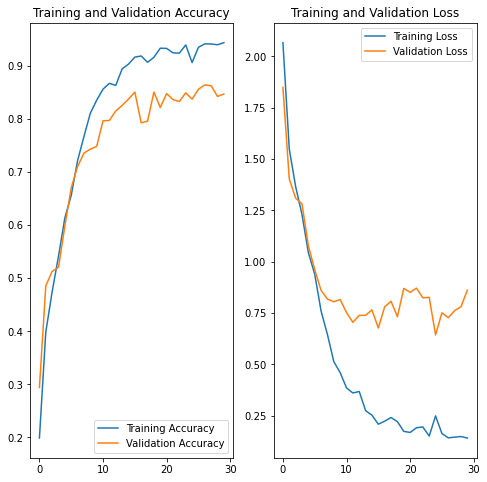

In [47]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**As per first sequential CNN model, overfitting can be observed since Training Accuracy is >80% where as the Validation Accuracy is is at nearly 50%. This implies that the model has learnt almost all the data points of the dataset and is unable to generalise and hence, poor performance during validation.**

**As per second sequential CNN model, we have successfully tackled overfitting by method of augmentation since both Training and Validation Accuracy is in the range of 50% to 60%. But, as a consequence of which, we can now observe underfitting by the model since accuracy is low on both accounts.**

**As per third sequential CNN model, we have successfully tackled underfitting. Training and Validation Accuracy has both gone up, >90% and >80% respectively. Class rebalance did come to the rescue.**

**So, initially we tackled overfitting, and then undefitting to reach a stage where we have a good model basis accuracy scores.**